In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

**Predicting for DataSet2 using Matrix inverse**

In [2]:
df = pd.read_csv('/kaggle/input/dataset3/Data2.csv')

In [3]:
df

,x,y
0,0.1,5.764952e+01
1,0.2,4.740870e+01
2,0.3,6.946902e+01
3,0.4,3.755086e+01
4,0.5,7.860685e+01
...,...,...
95,9.6,3.636073e+05
96,9.7,8.819300e+05
97,9.8,1.053557e+06
98,9.9,4.503040e+05


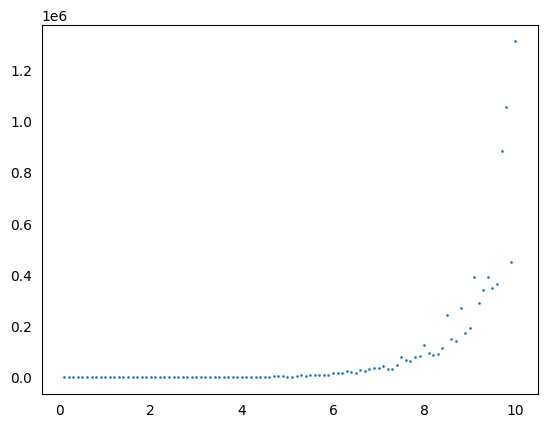

In [4]:
x_list = [float(i) for i in list(df['x'])]
y_list = [float(i) for i in list(df['y'])]

plt.scatter(x_list, y_list, s=0.8)
plt.tick_params(left = False, bottom = False)
plt.show()

In [5]:
x1 = np.array(df['x'])
a = sum(x1)

In [6]:
x1

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])

In [7]:
c = sum([i**2 for i in x1])

In [8]:
matrix_A = [[a, len(df)],[c, a]]

In [9]:
print(matrix_A)

[[505.0, 100], [3383.5000000000005, 505.0]]


In [10]:
A_inv = np.linalg.inv(matrix_A)

In [11]:
print(A_inv)

[[-0.00606061  0.00120012]
 [ 0.04060606 -0.00606061]]


In [12]:
y_new = [log(i) for i in df['y']]
p = sum(y_new)

In [13]:
print(p)

859.5759798115773


In [14]:
y1 = np.array(y_new)

In [15]:
q = x1*y1
print(sum(q))

5151.608824799193


In [16]:
B = [[p], [sum(q)]]
print(B)

[[859.5759798115773], [5151.608824799193]]


In [17]:
w = A_inv@B

In [18]:
w

array([[0.97299745],
       [3.68212267]])

In [19]:
print(w[0], w[1])

[0.97299745] [3.68212267]


In [20]:
b0 = e**(w[1])
b1 = w[0]

In [21]:
y_list = [b0*(e**(b1*i)) for i in df['x']]

In [22]:
print(df['x'])

0      0.1
1      0.2
2      0.3
3      0.4
4      0.5
      ... 
95     9.6
96     9.7
97     9.8
98     9.9
99    10.0
Name: x, Length: 100, dtype: float64


In [23]:
print(df['y'])

0     5.764952e+01
1     4.740870e+01
2     6.946902e+01
3     3.755086e+01
4     7.860685e+01
          ...     
95    3.636073e+05
96    8.819300e+05
97    1.053557e+06
98    4.503040e+05
99    1.311153e+06
Name: y, Length: 100, dtype: float64


In [24]:
print(y_list)

[array([43.7907414]), array([48.26574794]), array([53.19805853]), array([58.63440539]), array([64.62629635]), array([71.23050284]), array([78.50959782]), array([86.53254862]), array([95.37537038]), array([105.12184628]), array([115.86432139]), array([127.70457755]), array([140.75479778]), array([155.13862916]), array([170.99235434]), array([188.46618281]), array([207.72567404]), array([228.95330618]), array([252.35020491]), array([278.13804911]), array([306.56117118]), array([337.888872]), array([372.41797251]), array([410.47562599]), array([452.42241773]), array([498.6557815]), array([549.61376511]), array([605.77918075]), array([667.68417956]), array([735.91529356]), array([811.11899289]), array([894.00781094]), array([985.36709536]), array([1086.06244905]), array([1197.04793147]), array([1319.37509808]), array([1454.20296353]), array([1602.80898299]), array([1766.60115568]), array([1947.13136522]), array([2146.11008333]), array([2365.42257603]), array([2607.14676597]), array([2873.5

In [25]:
df['predicted'] = np.array(y_list)

In [26]:
df

,x,y,predicted
0,0.1,5.764952e+01,43.790741
1,0.2,4.740870e+01,48.265748
2,0.3,6.946902e+01,53.198059
3,0.4,3.755086e+01,58.634405
4,0.5,7.860685e+01,64.626296
...,...,...,...
95,9.6,3.636073e+05,452660.739299
96,9.7,8.819300e+05,498918.457322
97,9.8,1.053557e+06,549903.283951
98,9.9,4.503040e+05,606098.285727


In [27]:
def R2(df):
  return 1 - Rss(df) / Tss(df)

In [28]:
def Rss(df):
  return np.sum((df['y'] - df['predicted']) ** 2)

In [29]:
def Tss(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)

In [30]:
R2(df)

0.789068314366836

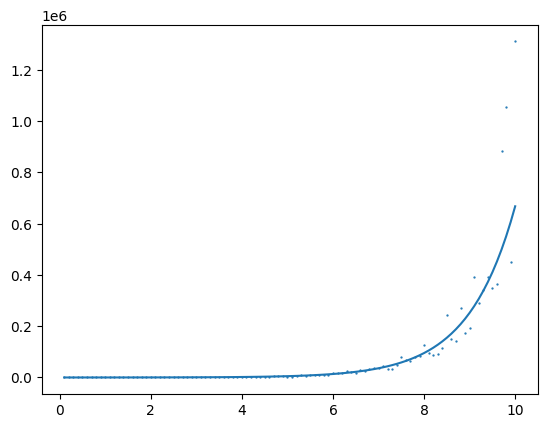

In [31]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df['predicted'])
plt.show()

**Verify using Scikit Learn**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [33]:
X = df[['x']]
y = df[['y']]

In [34]:
# Linearize the exponential function by taking the natural logarithm
y_log = np.log(y)

In [35]:
model = LinearRegression()
model.fit(X, y_log)

LinearRegression()

In [36]:
X_new = np.linspace(1, 10, 100).reshape(-1, 1)
y_pred_log = model.predict(X_new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
y_pred = np.exp(y_pred_log)

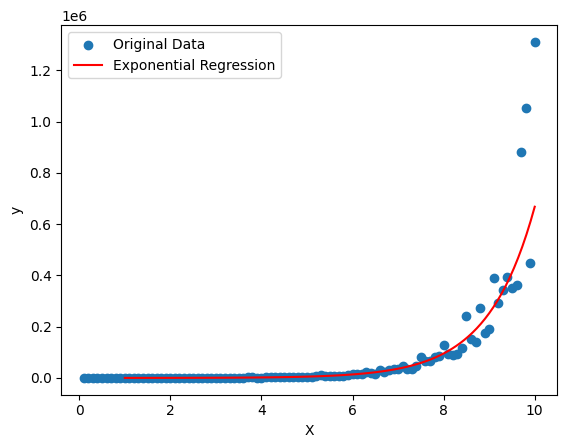

In [38]:
plt.scatter(X, y, label='Original Data')
plt.plot(X_new, y_pred, 'r-', label='Exponential Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [39]:
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.7890957012673756
